# Introductory applied machine learning (INFR10069)

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [144]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.dummy import DummyClassifier
from collections import defaultdict
import operator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict


sys.path.append('..')
from utils.plotter import scatter_jitter, plot_confusion_matrix

ImportError: cannot import name 'MinMaxScaler' from 'sklearn' (/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/__init__.py)

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [134]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')
auto_numeric.info()
print('The number of data data points in the data set: ',auto_numeric.shape[0])
print('The Number of features in the data set: ',auto_numeric.shape[1])
print ('** First ten lines of the data set **')
print (auto_numeric.head(10))
auto_numeric.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
normalized-losses          159 non-null float64
wheel-base                 159 non-null float64
length                     159 non-null float64
width                      159 non-null float64
height                     159 non-null float64
engine-size                159 non-null float64
bore                       159 non-null float64
stroke                     159 non-null float64
compression-ratio          159 non-null float64
engine-power               159 non-null float64
peak-rpm                   159 non-null float64
city-mpg                   159 non-null float64
highway-mpg                159 non-null float64
mean-effective-pressure    159 non-null float64
torque                     159 non-null float64
price                      159 non-null float64
dtypes: float64(16)
memory usage: 20.0 KB
The number of data data points in the data set:  159
The Number of features in the da

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


(2) The data set 'train_auto_numeric.csv' has a memory usage of 20 Kilo Bytes. This data set has 159 data points and 16 features. The features take on values that are real numbers (the data types of the feature values are float64). 

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

1 ) Correlation Coefficient of  normalized-losses  with price is  0.015367647423658213
2 ) Correlation Coefficient of  wheel-base  with price is  0.42351059515038575
3 ) Correlation Coefficient of  length  with price is  0.5128830452653906
4 ) Correlation Coefficient of  width  with price is  0.5243255521274495
5 ) Correlation Coefficient of  height  with price is  0.13956255898680378
6 ) Correlation Coefficient of  engine-size  with price is  0.7151245901914791
7 ) Correlation Coefficient of  bore  with price is  0.3652072892128543
8 ) Correlation Coefficient of  stroke  with price is  0.12783403193265097
9 ) Correlation Coefficient of  compression-ratio  with price is  0.12568322167466553
10 ) Correlation Coefficient of  engine-power  with price is  0.44396859146316336
11 ) Correlation Coefficient of  peak-rpm  with price is  -0.09934529106318549
12 ) Correlation Coefficient of  city-mpg  with price is  -0.3567895006724703
13 ) Correlation Coefficient of  highway-mpg  with price is  

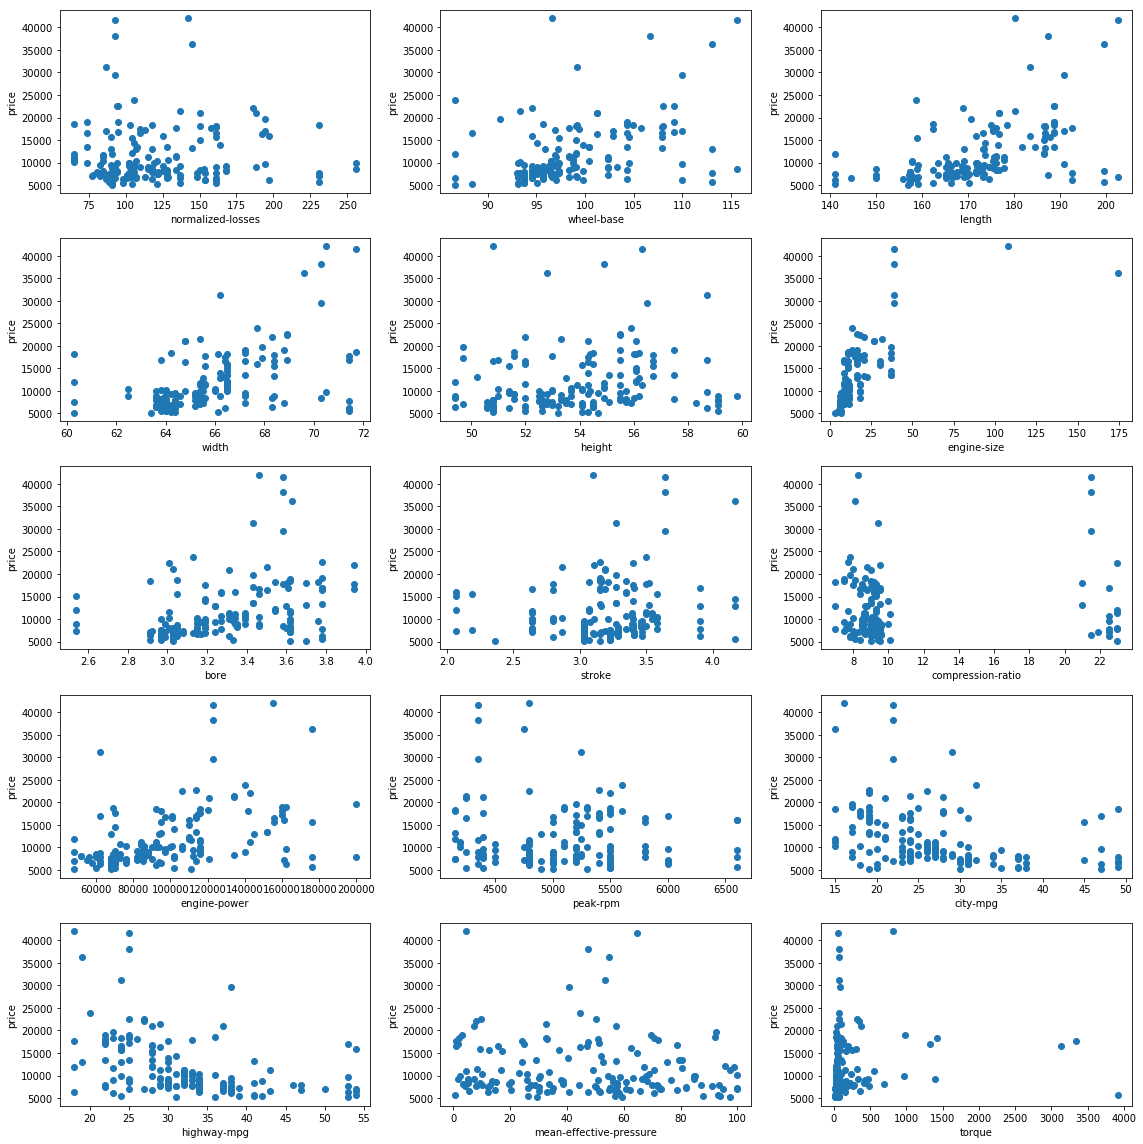

The top 5 correlation coefficients are: 
engine-size   0.7151245901914791
width   0.5243255521274495
length   0.5128830452653906
engine-power   0.44396859146316336
highway-mpg   -0.4384674317144328


In [7]:
corr_coeff_dict = defaultdict(int)
corr_coeff_dict_no_abs = defaultdict(int)
feature_names = list(auto_numeric.columns.values)

for i in range (0,15):
    cor_matrix = np.corrcoef(auto_numeric[feature_names[i]],auto_numeric['price'])
    cor_coeff_1 = cor_matrix[0,1]
    cor_coeff_2 = cor_matrix[1,0]
    corr_coeff_dict[feature_names[i]] = abs(cor_coeff_1) # the absolute value of Correlation coefficient
    corr_coeff_dict_no_abs[feature_names[i]] = cor_coeff_1
    print(i+1,') Correlation Coefficient of ',feature_names[i],' with price is ',cor_coeff_1)

# sorted list of absolute corr-coefficients    
sorted_lst = sorted(corr_coeff_dict.items(), key=operator.itemgetter(1), reverse=True) 

print('\n****')
print('Scatter Graph of each attribute (x axis) with price (y axis)')
print('****')
plt.subplots(5, 3, figsize=(16,16), sharex=False, sharey=True)
for i in range(0,15):
    plt.subplot(5,3,i+1)
    plt.scatter(auto_numeric[feature_names[i]],auto_numeric['price'])
    plt.xlabel(feature_names[i])
    plt.ylabel('price')    
plt.tight_layout()
plt.show()

print('The top 5 correlation coefficients are: ')
for i in range(5):
    print(sorted_lst[i][0],' ',corr_coeff_dict_no_abs[sorted_lst[i][0]])


(2) The attributes most useful for predicting the price are: (engine-size, width ,length, engine-power and highway-mpg).

This is because the attributes (engine-size, width ,length, engine-power) have the highest positive correlation coefficients with the price attribute. The attribute (highway-mpg) has the greatest negative correlation coefficient with the price attribute and taking the absolute value of (negative correlation coefficient) gives us the fifth highest correlation coefficient.

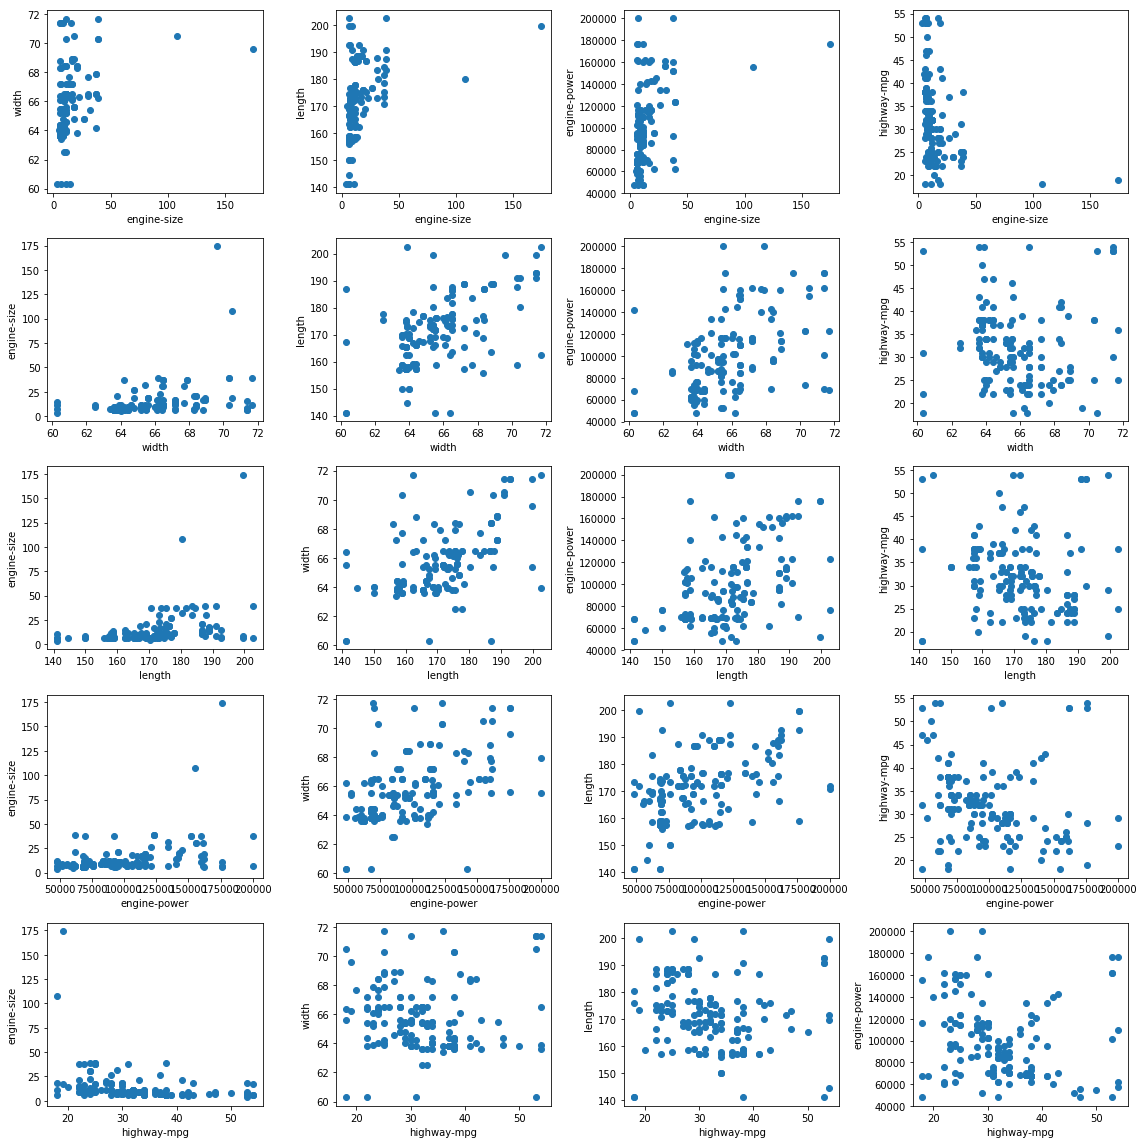

In [8]:
top_5_corr_coeff = ['engine-size','width','length','engine-power','highway-mpg']
plt.subplots(5, 4, figsize=(16,16), sharex=False, sharey=False)
graphctr = 0;
for i in range (0,len(top_5_corr_coeff)):
    for j in range(0,len(top_5_corr_coeff)):
        graphctr += 1
        if(i==j):
            graphctr -= 1
            continue
        plt.subplot(5,4,graphctr)
#         scatter_jitter(news_clean['w512_constantly'].values,news_clean['w513_generate'].values)
#         scatter_jitter(auto_numeric[top_5_corr_coeff[j]],auto_numeric[top_5_corr_coeff[i]])

        plt.scatter(auto_numeric[top_5_corr_coeff[i]],auto_numeric[top_5_corr_coeff[j]])
        plt.xlabel(top_5_corr_coeff[i])
        plt.ylabel(top_5_corr_coeff[j])    
plt.tight_layout()
plt.show()   

(4) Attribute pairs that seem to be closely related upon plotting are:
  1. Length and Width
  2. Length and Engine Power
  3. Width and Engine Power

(5) I would consider removing attributes:
1. Width: This is because Width is very closely related to Length as evident from the graphs. Consider the set of scatter graphs with respect to length (length on x axis) and those with respect to width (width on x axis). It can be seen that the graphs in both the sets look quite similar. Hence we can remove any one of them and I would choose to remove Width.

2. Engine-Size: Because for any given parmater like (width, length, engine power, highway-mpg) there is almost no variation in the Engine size despite a huge range on the x-axis ranging from (0-150). In fact it always has two points which are far away from the main distribution and seem like outliers. 

*********** Think of torque and Compression ratio show least correlatin with price for this answer



## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

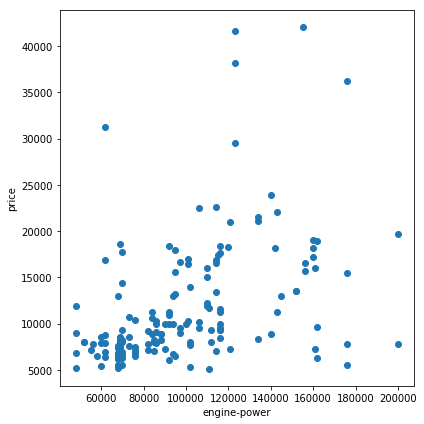

In [9]:
plt.figure(figsize=(6,6))
plt.scatter(auto_numeric['engine-power'],auto_numeric['price'])
plt.xlabel('engine-power')
plt.ylabel('price')
plt.tight_layout()
plt.show()  

(2) From the Graph it can be observed that, the most expensive car with the lowest engine-power, costs well below 15,000 but the car with the highest engine-power costs just near 20,000 and the overall most expensive car costs above 40,000 and has an engine power which is in the mid-range as compared to engine-powers of the other cars. 
Hence, engine-power can to some extent determine the price of the car but there are certainly other factors which also determine the car's price. Engine-Power alone is not the decisive factor for the price of the car. 

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

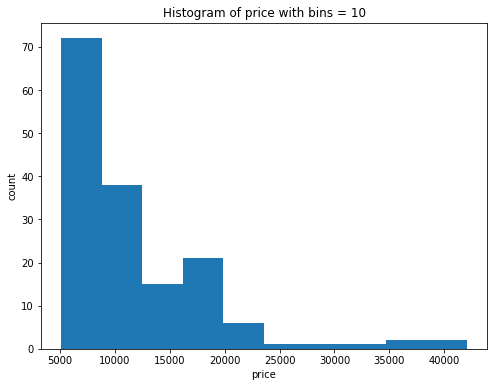

In [10]:
plt.figure(figsize=(8,6))
plt.title('Histogram of price with bins = 10')
n,bins,patches=plt.hist(auto_numeric['price'],bins=10)
plt.xlabel('price')
plt.ylabel('count')
plt.show()
# print(bins)

(2) The price variable may not be easy to model using linear regression because linear regression is sensitive to outliers. To improve it's applicability, for each input feature in the data set we may remove the outliers by testing the value against a threshold. 

It is not conclusive at this stage because, linear regression may be used to model the price variable upon pre-processing the given data set. This pre-processing can include removing the outliers in the data set or perform a certain transformation in the input features of the given data set.

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [11]:
X_matrix = auto_numeric['engine-power'].as_matrix().reshape(159,1)
Y_matrix = auto_numeric['price'].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_matrix, Y_matrix, test_size=0.2, train_size=0.8, random_state=0)
print('The Dimensions of the Data Set are: ',auto_numeric.shape)
print('The Dimensions of the independent attributes in Training Set set and Test Set are: ',X_train.shape,X_test.shape)
print('The Dimensions of the attribute "price" in Training Set and Test Set are: ',y_train.shape,y_test.shape)

The Dimensions of the Data Set are:  (159, 16)
The Dimensions of the independent attributes in Training Set set and Test Set are:  (127, 1) (32, 1)
The Dimensions of the attribute "price" in Training Set and Test Set are:  (127,) (32,)


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [12]:
# A simple baseline to predict the price variable is, by displaying the mean of 'price' in the dataset 
# for any given input features X. That is f(X) = average_price
average_price = auto_numeric.describe()['price']['mean']
coeff = [0]
print('The independent term in the linear model is: {0} \n \
Coefficient for the input feature "engine-power" is: {1}'.format(average_price,coeff))

The independent term in the linear model is: 11684.723270440252 
 Coefficient for the input feature "engine-power" is: [0]


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [62]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print('The independent term in the linear model is:',lr.intercept_)
print('Coefficient of input feature "engine-power" is:',lr.coef_[0])

The independent term in the linear model is: 2823.121891102828
Coefficient of input feature "engine-power" is: 0.0898838874386661


(2) The eqaution can be interpreted in the following way:
When the engine-power is zero the price is 2823.121891102828. For a one unit increase in the engine-power the price increases by an amount of 0.0898838874386661. 
There is only one attribute in the linear model which is the 'engine-power' attribute and a constant (2823.121891102828) that determines the price. Engine-power certainly has relevance to predict the price as it has a non-zero weight (0.0898838874386661) in the linear model.

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

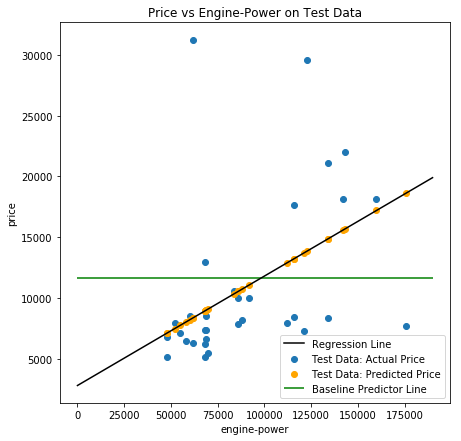

In [14]:
plt.figure(figsize=(7,7))
plt.scatter(X_test,y_test,label = 'Test Data: Actual Price')
x = np.array(range(190000))  
y = x * 0.0898838874386661 + 2823.121891102828
predicted_values = lr.predict(X_test)
plt.plot(x, y,color='black',label='Regression Line')  
plt.scatter(X_test,predicted_values,color='orange', label='Test Data: Predicted Price')
plt.hlines(11684.723270440252, 0, 190000, colors='green', linestyles='solid', label = 'Baseline Predictor Line')
plt.xlabel('engine-power')
plt.ylabel('price')
plt.title('Price vs Engine-Power on Test Data')
plt.legend()
plt.show()

(2) In the case of Linear Regression: There are prices in the test data that either coincide or are extremely close to the predicted price. However, there are certain prices in the test set that are far from their predicted values. 
In the case of Baseline Model: There are no prices in test data that exactly coincide with the baseline predicted price. In most cases the test data price lies below the baseline predicted price.
The Linear Regression Model is hence, better at predicting the price when comapred to the baseline model since it actually has points that are very near to it.

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


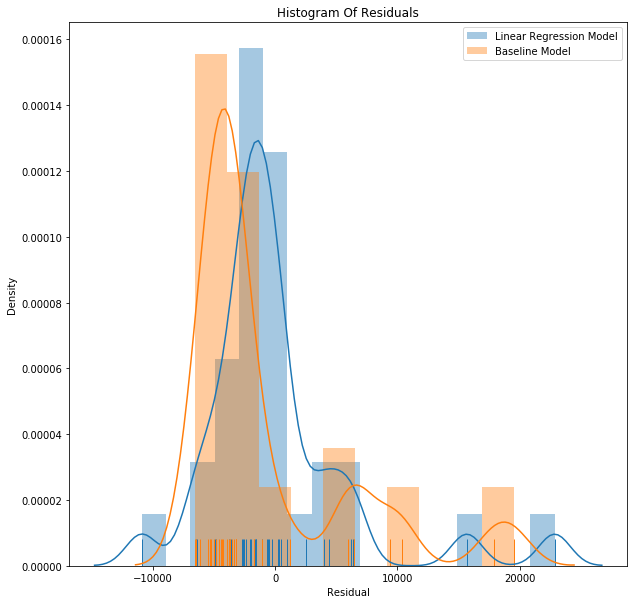

In [15]:
# predicted_values
plt.figure(figsize=(10,10))
n = len(y_test)
predicted_val = [11684.723270440252] * n
sns.distplot(y_test-predicted_values,rug=True,label='Linear Regression Model')
sns.distplot(y_test-predicted_val,rug=True,label='Baseline Model')
plt.title("Histogram Of Residuals")
plt.ylabel("Density")
plt.xlabel("Residual")
plt.legend()
plt.show()

In [16]:
r2_linear = r2_score(y_test, predicted_values) # r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
rmse_linear = np.sqrt(mean_squared_error(y_test, predicted_values)) # mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
print('Linear Regression Model \nCoefficient of Determination: {0}, Root Mean Squared Error: {1} '.format(r2_linear,rmse_linear))
n = len(y_test)
predicted_val = [11684.723270440252] * n
r2_baseline = r2_score(y_test, predicted_val)
rmse_baseline = np.sqrt(mean_squared_error(y_test, predicted_val)) # mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
print('\nBaseline Model \nCoefficient of Determination: {0}, Root Mean Squared Error: {1} '.format(r2_baseline,rmse_baseline))

Linear Regression Model 
Coefficient of Determination: 0.16852372539951466, Root Mean Squared Error: 6153.70386613629 

Baseline Model 
Coefficient of Determination: -0.00982455873278787, Root Mean Squared Error: 6781.638354494784 


<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) The problem with hold-out test set validation is the fact that, upon partitioning the dataset the classes may not really be balanced.

In [36]:
kfold = KFold(n_splits=5,random_state=0,shuffle=True)
i = 0
for training_indices, testing_indices in kfold.split(auto_numeric):
    i += 1
    print("Fold: ",i)
    print("Training Indices: \n",training_indices)
    print("Testing Indices: \n",testing_indices)
    print("\n")

Fold:  1
Training Indices: 
 [  0   1   2   3   4   5   6   9  10  11  12  13  14  15  16  17  18  20
  21  22  23  25  27  28  29  30  31  32  34  35  36  38  39  41  42  43
  46  47  48  49  50  51  52  53  55  57  58  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  84  87  88  89  91  92
  93  94  96  97  98  99 100 101 102 103 104 105 106 107 108 109 111 112
 113 114 115 116 117 118 121 122 123 124 125 127 129 130 132 133 135 136
 137 138 139 140 141 143 145 146 147 149 150 151 152 153 154 155 156 157
 158]
Testing Indices: 
 [  7   8  19  24  26  33  37  40  44  45  54  56  59  60  61  62  63  83
  85  86  90  95 110 119 120 126 128 131 134 142 144 148]


Fold:  2
Training Indices: 
 [  0   1   3   4   5   6   7   8   9  11  12  13  14  15  17  19  20  21
  23  24  25  26  28  29  31  32  33  34  35  36  37  38  39  40  41  42
  44  45  46  47  48  49  50  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  67  68  69  70  72  75  76  77  78  79  

In [59]:
lr_new_model = LinearRegression()
predictions = cross_val_predict(lr_new_model,X_matrix, Y_matrix,cv=kfold)
r2_linear_cross = r2_score(auto_numeric['price'], predictions) # r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
rmse_linear_cross = np.sqrt(mean_squared_error(auto_numeric['price'], predictions)) # mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
print('Linear Regression Model with cross validation\
\nCoefficient of Determination: {0}, Root Mean Squared Error: {1} '.format(r2_linear_cross,rmse_linear_cross))

Linear Regression Model with cross validation
Coefficient of Determination: 0.1730052709757075, Root Mean Squared Error: 6114.452118615525 


(4) Linear Regression Model 
Coefficient of Determination: 0.16852372539951466, Root Mean Squared Error: 6153.70386613629 
Linear Regression Model with cross validation
Coefficient of Determination: 0.1730052709757075, Root Mean Squared Error: 6114.452118615525 

On comparing the values for both the models it can be seen that the Coefficient of Determination for the Linear Regression Model with cross validation is greater. This implies that there are more predictions that fit in the linear regesion model with cross validation. There is also a reduction in the Root Mean squared error for the Regression Model with cross validation. This implies that the predictions are closer to the real values.

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [72]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')
# Building Linear Regression Model
X_matrix_auto_base = auto_base['engine-power'].as_matrix().reshape(159,1)
Y_matrix_auto_base = auto_base['price'].as_matrix()
X_train_auto_base, X_test_auto_base, y_train_auto_base,y_test_auto_base = \
train_test_split(X_matrix_auto_base, Y_matrix_auto_base, test_size=0.2, train_size=0.8, random_state=0)
lr_auto_base = LinearRegression()
lr_auto_base.fit(X_train_auto_base,y_train_auto_base)
predictions_auto_base = lr_auto_base.predict(X_test_auto_base)
# Computing the R^2 and RMSE metrics for this model
r2_auto_base = r2_score(y_test_auto_base, predictions_auto_base) # r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
rmse_auto_base = np.sqrt(mean_squared_error(y_test_auto_base, predictions_auto_base)) # mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
print('Linear Regression Model with train_auto_base.csv\
 \nCoefficient of Determination: {0}, Root Mean Squared Error: {1} '.format(r2_auto_base,rmse_auto_base))

Linear Regression Model with train_auto_base.csv 
Coefficient of Determination: -0.015399260296584893, Root Mean Squared Error: 6800.33149133527 


/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/ayushdas/miniconda3/envs/py3iaml/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


The coefficient of Engine-Power in linear regression is: 0.0
The constant term in the linear regression is: 11853.267716535433

** The price averages across the data set
Average price in Entire Data is:  11684.723270440252
Average price in Test Data is:  11015.8125
Average price in Training Data is:  11853.267716535433 



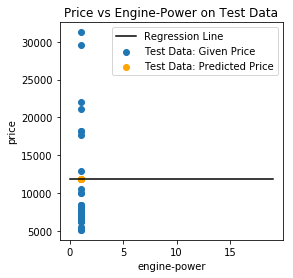

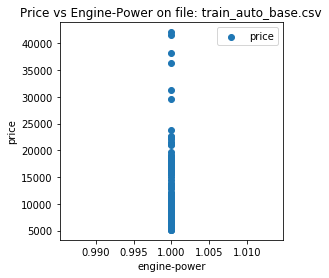

The data point value and the frequency count: 
The data point values and frquency of engine-power: 
1.0    159
Name: engine-power, dtype: int64
The data point values and frequency of price: 
5572.0     2
7898.0     2
13499.0    2
7609.0     2
8845.0     2
6692.0     2
9279.0     2
7295.0     2
7957.0     2
6229.0     2
7775.0     2
8495.0     2
18150.0    2
8921.0     2
7299.0     1
22470.0    1
5348.0     1
9960.0     1
9980.0     1
22018.0    1
11259.0    1
8013.0     1
15040.0    1
5389.0     1
9233.0     1
6479.0     1
41600.0    1
7689.0     1
15510.0    1
7788.0     1
          ..
7603.0     1
9095.0     1
16430.0    1
9549.0     1
13950.0    1
13200.0    1
31248.0    1
6488.0     1
6938.0     1
11248.0    1
10345.0    1
6529.0     1
8949.0     1
6669.0     1
7895.0     1
6695.0     1
9258.0     1
16925.0    1
18280.0    1
5118.0     1
9639.0     1
22625.0    1
7499.0     1
7053.0     1
11199.0    1
7975.0     1
7395.0     1
14399.0    1
6849.0     1
9298.0     1
Name: price, Len

In [110]:
# Printing the coefficients of the linear regression model
print('The coefficient of Engine-Power in linear regression is: {0}\n\
The constant term in the linear regression is: {1}\n'.format(lr_auto_base.coef_[0],lr_auto_base.intercept_))

# Printing the average of prices in te entire dataset, training set and test set. 
# This is then used to compare with coefficients of the linear regression model.
print('** The price averages across the data set')
print('Average price in Entire Data is: ',auto_base.describe()['price']['mean'])
print('Average price in Test Data is: ',y_test_auto_base.mean())
print('Average price in Training Data is: ',y_train_auto_base.mean(),'\n')

# Printing the graphs of test data (price vs Engine Power) , 
# test data (Predicted price vs Engine Power) and drawing the line for the linear regression model.
plt.figure(figsize=(4,4))
plt.scatter(X_test_auto_base,y_test_auto_base,label = 'Test Data: Given Price')
plt.scatter(X_test_auto_base,predictions_auto_base,color='orange', label='Test Data: Predicted Price')
x = np.array(range(20))  
y = x * lr_auto_base.coef_[0]  + lr_auto_base.intercept_
plt.plot(x, y,color='black',label='Regression Line')  
plt.xlabel('engine-power')
plt.ylabel('price')
plt.title('Price vs Engine-Power on Test Data')
plt.legend()
plt.show()

# Printing the graph of the entire data set of train_auto_base.csv (Graph of price vs Engine Power) 
# to get an understanding of the overall data distribution
plt.figure(figsize=(4,4))
plt.scatter(auto_base['engine-power'],auto_base['price'])
plt.xlabel('engine-power')
plt.ylabel('price')
plt.title('Price vs Engine-Power on file: train_auto_base.csv')
plt.legend()
plt.show()

# Printing the data point values and it's  corresponding 
# frequency for a given attribute in the data set. This will help
# to get a numerical understanding of the data set.
print('The data point value and the frequency count: ')
print('The data point values and frquency of engine-power: ')
print(auto_base['engine-power'].value_counts())
print('The data point values and frequency of price: ')
print(auto_base['price'].value_counts())

(2) It is observed that the Coefficient of Determination is -0.015399260296584893 and Root Mean Squared Error (RMSE) for the new model is 6800.33149133527. The coefficient of determination is much lower and the RMSE is much higher than the linear regression model built previously. This is because the the data set contains several different price for a given engine-power (1.0). In fact there is only one value for engine-power and this is 1.0. Corresponding to this there are several different prices. The linear regression model when trained on the training set returns the co-efficient term as 0 and constant term as 11853.267716535433. The average price in Training Data set is also 11853.267716535433. Hence the linear regression model is simply returning the training data average price as the predicted value.

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [124]:
mvlr = LinearRegression()
X_matrix = auto_numeric.drop('price',axis=1, inplace=False)
Y_matrix = auto_numeric['price']
predicted_mvlr = cross_val_predict(mvlr,X_matrix,Y_matrix,cv=kfold)
r2_mvlr = r2_score(Y_matrix, predicted_mvlr) # r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
rmse_mvlr = np.sqrt(mean_squared_error(Y_matrix, predicted_mvlr)) # mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
print('Multivariate Linear Regression Model\
 \nCoefficient of Determination: {0}, Root Mean Squared Error: {1} '.format(r2_mvlr,rmse_mvlr))

Multivariate Linear Regression Model 
Coefficient of Determination: 0.48613798445730905, Root Mean Squared Error: 4819.804642834616 


(2) 
Multivariate Linear Regression Model 
Coefficient of Determination: 0.48613798445730905, Root Mean Squared Error: 4819.804642834616 
Univariate Linear Regression Model
Coefficient of Determination: 0.1730052709757075, Root Mean Squared Error: 6114.452118615525 

On comparing the Co efficient of determination for both the models, the multivaraiate model has a much higher value. This implies that more of the prices from the values on the dataset lie on the multivariate regression model.
The multivariate regression model also has a much smaller root mean squared error. This implies that the error in predictions of the multivariate model is lesser than the univaraite regression model.

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` again (plot again below)
1. [Text] Why might this cause a problem for linear regression? 

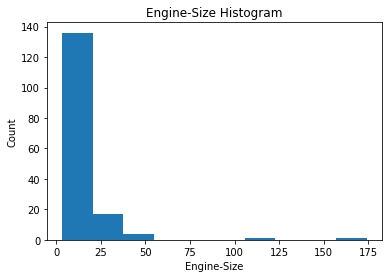

Text(0.5,1,'Engine-size')

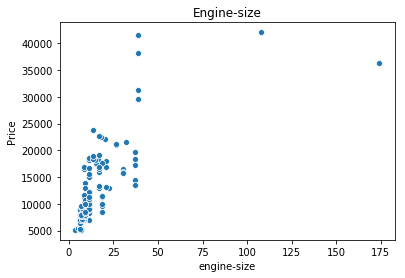

In [130]:
# (1) #STARTHIDE#
# [2 Marks] - Plot histogram with labels


plt.hist(auto_numeric['engine-size'])
plt.xlabel('Engine-Size')
plt.ylabel('Count')
plt.title('Engine-Size Histogram')
plt.show()

ax = sns.scatterplot(auto_numeric['engine-size'], auto_numeric['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-size')

(2) Linear regression is extremely sensitive to outliers. Most of the engine-size is below 75 units. However there are two data points which are very far away from the main distribution. These might cause errors in the linear regression prediction model as it will cause the prediction model to shift in accordance to the outliers. 

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a LinearRegression Model and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

Text(0.5,1,'Price vs Engine-size')

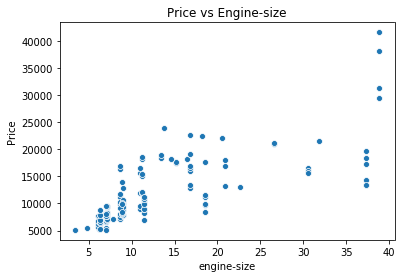

In [140]:
auto_numeric_clean = auto_numeric[auto_numeric['engine-size'] < 75] # choosing 75 as the threshold engine-size
ax = sns.scatterplot(auto_numeric_clean['engine-size'], auto_numeric_clean['price'])
ax.set_ylabel('Price')
ax.set_xlabel('engine-size')
ax.set_title('Price vs Engine-size')

In [138]:
mvlr_2 = LinearRegression()
X_matrix = auto_numeric_clean.drop('price',axis=1, inplace=False)
Y_matrix = auto_numeric_clean['price']
predicted_mvlr_2 = cross_val_predict(mvlr_2,X_matrix,Y_matrix,cv=kfold)
r2_mvlr_2 = r2_score(Y_matrix, predicted_mvlr_2) # r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
rmse_mvlr_2 = np.sqrt(mean_squared_error(Y_matrix, predicted_mvlr_2)) # mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
print('Multivariate Linear Regression Model\
 \nCoefficient of Determination: {0}, Root Mean Squared Error: {1} '.format(r2_mvlr_2,rmse_mvlr_2))

Multivariate Linear Regression Model 
Coefficient of Determination: 0.5919039922758846, Root Mean Squared Error: 3829.867893189577 


The performance of the retrained model has improved after removing the outliers. The R^2 value has increased to 0.59 from 0.48 and the RMSE has also decreased from 4819 to 3829. This improvement in the model performance is because, linear regession is extremely sensitive to the presence of outliers in the data set. These outliers were causing the prediction model to shift and predict some wrong values. On removing the outliers the regression model is able to better fit the data, to predict the price. 

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) The regular co-efficients in the linear model use different scales, hence they cannot be comapared directly. To compare them directly we can scale the value of each of the attributes such that the values are in a  range of '[0,1]',then comapre their weights. To do this we can use the scikit learn minmax scaler.

In [192]:
from sklearn import preprocessing
# The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data.
min_max_scaler = preprocessing.MinMaxScaler() # deafult range is [0,1]
X_values = auto_numeric_clean.drop('price',axis=1, inplace=False)
Y_values = auto_numeric_clean['price']
X_train_minmax = min_max_scaler.fit_transform(X_values)
# print(X_train_minmax.shape)

mvlr_3 = LinearRegression()
mvlr_3.fit(X_values,Y_values)

columns = list(X_values.columns.values)
print('The independent term in the linear model is:',mvlr_3.intercept_)
print('Coefficient of input features are as follows:')
coeff_lst = list(zip(columns, mvlr_3.coef_))
coeff_dict = dict()
i=0
for tup in coeff_lst:
    i += 1
    coeff_dict[tup[0]] = tup[1]
    print(i,tup[0],' : ',tup[1])
coeff_lst_abs=list(zip(columns, abs(mvlr_3.coef_)))
sorted_coeff_lst_abs = sorted(coeff_lst_abs, key=lambda tup: tup[1], reverse=True)

predicted_values_3 = mvlr_3.predict(X_values)
r2_mvlr_3 = r2_score(Y_values, predicted_values_3) # r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
rmse_mvlr_3 = np.sqrt(mean_squared_error(Y_values, predicted_values_3)) # mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
print('\nMultivariate Linear Regression Model\
 \nCoefficient of Determination: {0}, Root Mean Squared Error: {1} \n'.format(r2_mvlr_3,rmse_mvlr_3))

print('Top 3 coefficients are: ')
for i in range(3):
    print(i+1,sorted_coeff_lst_abs[i][0],' Value of coefficient: '\
          ,coeff_dict[sorted_coeff_lst_abs[i][0]],' Absolute value of coefficient: ', sorted_coeff_lst_abs[i][1])

The independent term in the linear model is: -45545.38833132834
Coefficient of input features are as follows:
1 normalized-losses  :  -9.383512498290942
2 wheel-base  :  122.5559016910037
3 length  :  11.09975994621749
4 width  :  551.8368609147799
5 height  :  178.90419736208418
6 engine-size  :  439.4961436591618
7 bore  :  -441.0359304352491
8 stroke  :  -1904.2023460251041
9 compression-ratio  :  173.63660201936887
10 engine-power  :  -0.0142442121724639
11 peak-rpm  :  1.173243543898567
12 city-mpg  :  48.41319346313337
13 highway-mpg  :  -198.39554216820926
14 mean-effective-pressure  :  -20.46319286890157
15 torque  :  -0.22155455384029565

Multivariate Linear Regression Model 
Coefficient of Determination: 0.7197431769921205, Root Mean Squared Error: 3173.8084925517346 

Top 3 coefficients are: 
1 stroke  Value of coefficient:  -1904.2023460251041  Absolute value of coefficient:  1904.2023460251041
2 width  Value of coefficient:  551.8368609147799  Absolute value of coefficient

(3) The three most important features for predicting price based on the weights are:
1. stroke 
2. width
3. bore

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) To test higher order relationship on a given input feature a scatter plot of the class being predicted vs the feature should be drawn. A curvilinear relationship implies that, the relationship of the feature to the class belongs to some non linear order. 
In order to choose the best polynomial for these features, plot individual scatter plots of the class vs the feature. In each of these graphs, fit a polynomial curve as a function of the feature in such a way, so as to minimize the RMSE of the data points with respect to the polynomial curve. This should should be tried for a first order polynomial, second order polynomial, a third, fourth and so on. Depending upon the compute resource and domain knowledge available the limit must be chosen. Once a polynomial curve is encountererd in which the RMSE is least. Then the order of that polynomial cure is the polynomial order for that particular feature. Similary repeat the steps for the other non-linear features to arrive at the polynimial degree for them.

In [206]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_nonlinear.csv')
auto_nonlinear = pd.read_csv(data_path, delimiter = ',')
# print(auto_nonlinear.head(5)['length'])
auto_nonlinear['length'] = auto_nonlinear['length']*auto_nonlinear['length']
auto_nonlinear['engine-power'] = auto_nonlinear['engine-power']*auto_nonlinear['engine-power']
X_values = auto_nonlinear.drop('price',axis=1, inplace=False)
Y_values = auto_nonlinear['price']
mvlr_4 = LinearRegression()
mvlr_4.fit(X_values,Y_values)
predicted_values_4 = mvlr_4.predict(X_values)
r2_mvlr_4 = r2_score(Y_values, predicted_values_4) # r2_score(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
rmse_mvlr_4 = np.sqrt(mean_squared_error(Y_values, predicted_values_4)) # mean_squared_error(y_true, y_pred, sample_weight=None, multioutput=’uniform_average’)
print('\nMultivariate Linear Regression Model\
 \nCoefficient of Determination: {0}, Root Mean Squared Error: {1} \n'.format(r2_mvlr_4,rmse_mvlr_4))


Multivariate Linear Regression Model 
Coefficient of Determination: 0.7618651962313563, Root Mean Squared Error: 3281.0860027179383 



(3) Multivariate Linear Regression Model where all the features were linear, had the following R^2 and RMSE values
R^2: 0.5919039922758846, RMSE: 3829.867893189577 
Multivariate Linear Regression Model where second order basis was added to length and engine-power had the following R^2 and RMSE values
Coefficient of Determination: 0.7618651962313563, Root Mean Squared Error: 3281.0860027179383.

It can be seen that upon inclusion of the second order basis for the two attributes (length,engine power). There is a marked improvement in the performance of the model. The R^2 value has increased which implies that more of the prices now fit on the prediction curve. There is also a reduction in the RMSE values which implies that those prices that are not on the predicted curve lie nearer to the model than inthe case of the simple linear regression without second order basis.